In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import json

In [3]:
# extract the runtime of exact queries
exact_runtime = {}
with open("data/exact/all_results.jsonl") as f:
    for line in f:
        data = json.loads(line)
        runtime = data["runtime"]["exact_execution"]
        query = data["query"]
    
        exact_runtime[query] = runtime

In [4]:
# extract the runtime of approximate queries
approx_runtime = defaultdict(list)
with open("data/aqp/all_results.jsonl") as f:
    for line in f:
        data = json.loads(line)
        runtime = data["runtime"]["runtime"]
        query = data["query"]
    
        approx_runtime[query].append(runtime)
approx_runtime = {k: np.mean(v) for k, v in approx_runtime.items()}

In [5]:
# compute the speedup
speedup = {k: exact_runtime[k] / v for k, v in approx_runtime.items()}
agg_speedup = {k: np.mean(v) for k, v in speedup.items() if "agg" in k}
groupby_speedup = {k: np.mean(v) for k, v in speedup.items() if "groupby" in k}
join_speedup = {k: np.mean(v) for k, v in speedup.items() if "join" in k}
agg_speedup_geometric_mean = np.exp(np.mean(np.log(list(agg_speedup.values()))))
groupby_speedup_geometric_mean = np.exp(np.mean(np.log(list(groupby_speedup.values()))))
join_speedup_geometric_mean = np.exp(np.mean(np.log(list(join_speedup.values()))))
overall_speedup_geometric_mean = np.exp(np.mean(np.log(list(speedup.values()))))

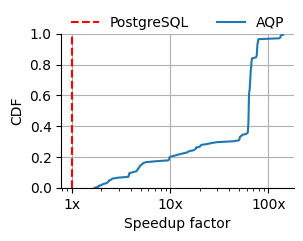

In [13]:
# plot the cdf
speedup_list = list(speedup.values())
speedup_list.sort()
yvals = np.arange(len(speedup_list))/float(len(speedup_list))
plt.figure(figsize=(3,2))
plt.xscale("log")
plt.grid()
plt.yticks([0.2 * i for i in range(6)])
plt.ylim(0,1)
plt.xlabel("Speedup factor")
plt.ylabel("CDF")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(x=1, color='r', linestyle='--', label="PostgreSQL")
plt.plot(speedup_list, yvals, label="AQP", color='C0')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, frameon=False)
plt.xticks([1, 10, 100], ['1x', '10x', '100x'])
plt.savefig("speedup_cdf.pdf", bbox_inches='tight')

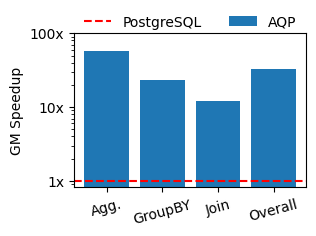

In [12]:
import matplotlib.pyplot as plt
speedups = [agg_speedup_geometric_mean, groupby_speedup_geometric_mean, 
            join_speedup_geometric_mean, overall_speedup_geometric_mean]
types = ['Agg.', 'GroupBY', 'Join', 'Overall']
plt.figure(figsize=(3,2))
plt.bar(types, speedups, label="AQP", color='C0')
plt.xticks(rotation=15)
plt.axhline(y=1, color='r', linestyle='--', label="PostgreSQL")
plt.ylabel('GM Speedup')
plt.yscale('log')
plt.yticks([1, 10, 100], ['1x', '10x', '100x'])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2, frameon=False)
plt.savefig("speedup_bar.pdf", bbox_inches='tight')